In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [79]:
flight = sns.load_dataset('flights')

In [80]:
flight

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [81]:
flight['Date'] = flight['year'].astype(str)+'-'+flight['month'].astype(str)
flight['Date'] = pd.to_datetime(flight['Date'])

In [82]:
flight.set_index('Date', inplace=True)

In [83]:
flight.head()

,year,month,passengers
Date,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


In [84]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 3.9 KB


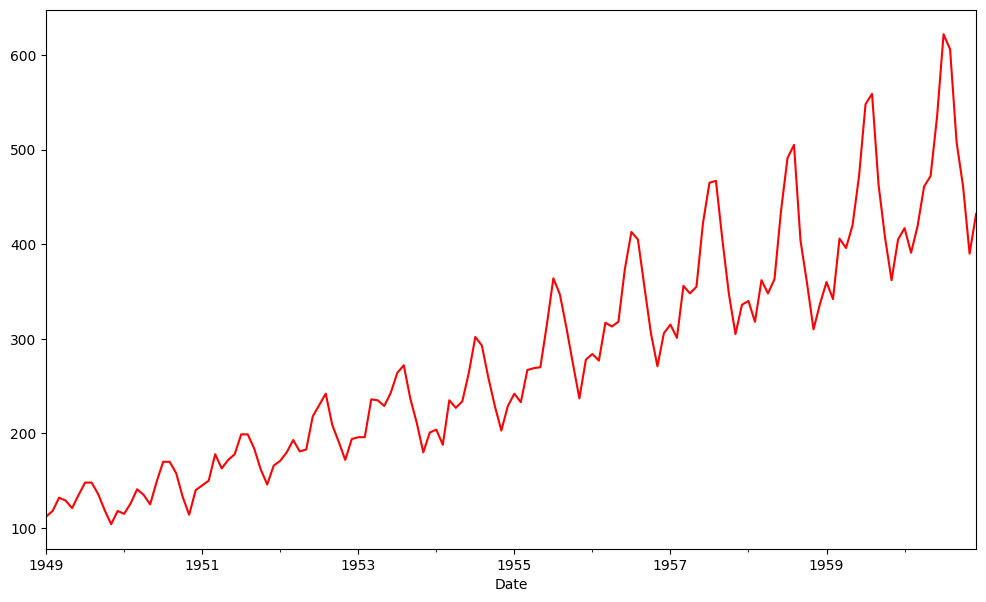

In [85]:
ax = flight['passengers'].plot(figsize=(12, 7), style='red')

In [86]:
flight['rollmean'] = flight['passengers'].rolling(window=12).mean()
flight['rollstd'] = flight['passengers'].rolling(window=12).std()

In [87]:
flight.head(13)

,year,month,passengers,rollmean,rollstd
Date,,,,,
1949-01-01,1949,Jan,112,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN
1949-03-01,1949,Mar,132,NaN,NaN
1949-04-01,1949,Apr,129,NaN,NaN
1949-05-01,1949,May,121,NaN,NaN
1949-06-01,1949,Jun,135,NaN,NaN
1949-07-01,1949,Jul,148,NaN,NaN
1949-08-01,1949,Aug,148,NaN,NaN
1949-09-01,1949,Sep,136,NaN,NaN


<AxesSubplot:xlabel='Date'>

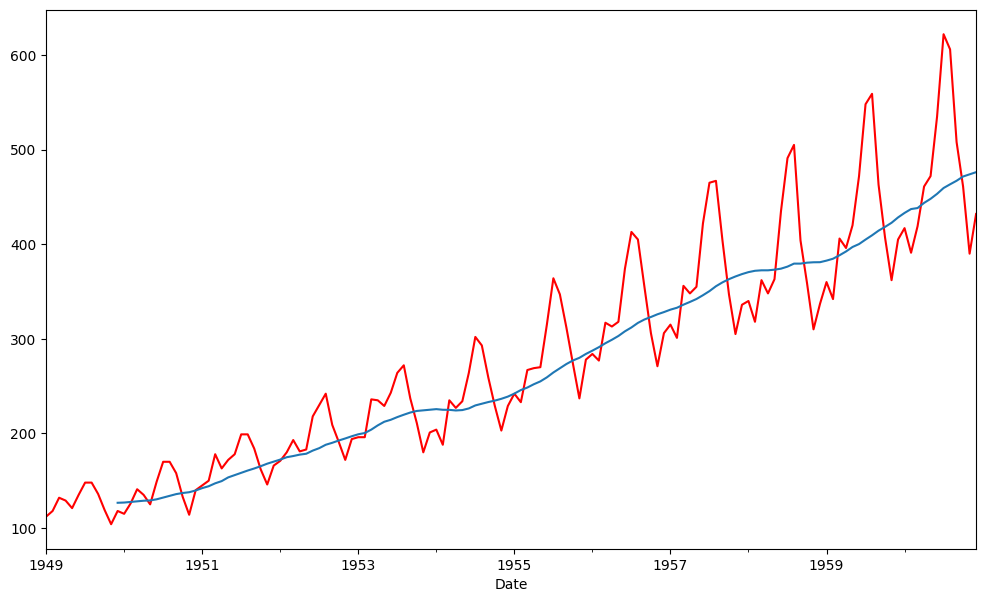

In [88]:
flight['passengers'].plot(figsize=(12, 7), style='red')
flight['rollmean'].plot(figsize=(12, 7))

<AxesSubplot:xlabel='Date'>

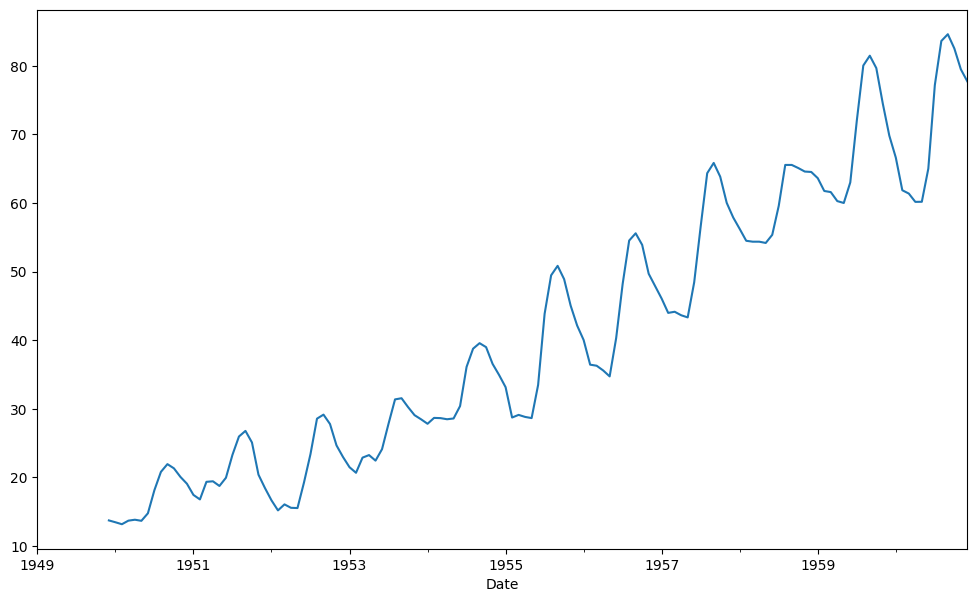

In [89]:
flight['rollstd'].plot(figsize=(12, 7))

In [90]:
from statsmodels.tsa.stattools import adfuller

In [91]:
adftest = adfuller(flight['passengers'], autolag='AIC')

In [92]:
adftest

(0.8153688792060441,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [93]:
def test_stats(df, var):
    df['rollmean'] = df[var].rolling(window=12).mean()
    df['rollstd'] = df[var].rolling(window=12).std()
    
    from statsmodels.tsa.stattools import adfuller
    adftest = adfuller(df[var], autolag='AIC')
    stats = pd.Series(adftest[0:4], index=['Test Stats', 'p-value', '#lags used', 'no_of_observations'])
    return stats

In [94]:
flight = sns.load_dataset('flights')
flight['Date'] = flight['year'].astype(str)+'-'+flight['month'].astype(str)
flight['Date'] = pd.to_datetime(flight['Date'])
flight.set_index('Date', inplace=True)
flight.pop('year')
flight.pop('month')

Date
1949-01-01    Jan
1949-02-01    Feb
1949-03-01    Mar
1949-04-01    Apr
1949-05-01    May
             ... 
1960-08-01    Aug
1960-09-01    Sep
1960-10-01    Oct
1960-11-01    Nov
1960-12-01    Dec
Name: month, Length: 144, dtype: category
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

In [95]:
flight.head()

,passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [96]:
flight['shifted_1mo'] = flight['passengers'].shift()
flight.head()

,passengers,shifted_1mo
Date,,
1949-01-01,112,NaN
1949-02-01,118,112.0
1949-03-01,132,118.0
1949-04-01,129,132.0
1949-05-01,121,129.0


In [97]:
flight['shiftDiff'] = flight['passengers']-flight['shifted_1mo']

In [98]:
flight

,passengers,shifted_1mo,shiftDiff
Date,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0
...,...,...,...
1960-08-01,606,622.0,-16.0
1960-09-01,508,606.0,-98.0
1960-10-01,461,508.0,-47.0


In [99]:
test_stats(flight.dropna(), 'shiftDiff')

C:\Users\Kavita manoj\AppData\Local\Temp\ipykernel_22312\3463493031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollmean'] = df[var].rolling(window=12).mean()
C:\Users\Kavita manoj\AppData\Local\Temp\ipykernel_22312\3463493031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollstd'] = df[var].rolling(window=12).std()


Test Stats             -2.829267
p-value                 0.054213
#lags used             12.000000
no_of_observations    130.000000
dtype: float64

In [100]:
flight = sns.load_dataset('flights')
flight['Date'] = flight['year'].astype(str)+'-'+flight['month'].astype(str)
flight['Date'] = pd.to_datetime(flight['Date'])
flight.set_index('Date', inplace=True)
flight.pop('year')
flight.pop('month')

Date
1949-01-01    Jan
1949-02-01    Feb
1949-03-01    Mar
1949-04-01    Apr
1949-05-01    May
             ... 
1960-08-01    Aug
1960-09-01    Sep
1960-10-01    Oct
1960-11-01    Nov
1960-12-01    Dec
Name: month, Length: 144, dtype: category
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

In [101]:
flight['log'] = np.log(flight['passengers'])

In [102]:
flight['shiftedLog'] = flight['log'].shift()

In [103]:
flight['shiftedLogDiff'] = flight['log']-flight['shiftedLog']

In [104]:
test_stats(flight.dropna(), 'shiftedLog')

C:\Users\Kavita manoj\AppData\Local\Temp\ipykernel_22312\3463493031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollmean'] = df[var].rolling(window=12).mean()
C:\Users\Kavita manoj\AppData\Local\Temp\ipykernel_22312\3463493031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollstd'] = df[var].rolling(window=12).std()


Test Stats             -1.689021
p-value                 0.436778
#lags used             13.000000
no_of_observations    129.000000
dtype: float64

In [105]:
flight = sns.load_dataset('flights')
flight['Date'] = flight['year'].astype(str)+'-'+flight['month'].astype(str)
flight['Date'] = pd.to_datetime(flight['Date'])
flight.set_index('Date', inplace=True)
flight.pop('year')
flight.pop('month')
flight['log'] = np.log(flight['passengers'])
flight['sqrt_log'] = np.log(flight['log'])


In [106]:
test_stats(flight, 'sqrt_log')

Test Stats             -2.156028
p-value                 0.222590
#lags used             13.000000
no_of_observations    130.000000
dtype: float64

In [107]:
flight = sns.load_dataset('flights')
flight['Date'] = flight['year'].astype(str)+'-'+flight['month'].astype(str)
flight['Date'] = pd.to_datetime(flight['Date'])
flight.set_index('Date', inplace=True)
flight.pop('year')
flight.pop('month')
flight['log'] = np.log(flight['passengers'])
flight['sqrt_log'] = np.log(flight['log'])
flight['sqrt_log_diff'] = flight['sqrt_log']-flight['sqrt_log'].shift()

In [108]:
test_stats(flight.dropna(), 'sqrt_log_diff')

C:\Users\Kavita manoj\AppData\Local\Temp\ipykernel_22312\3463493031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollmean'] = df[var].rolling(window=12).mean()
C:\Users\Kavita manoj\AppData\Local\Temp\ipykernel_22312\3463493031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollstd'] = df[var].rolling(window=12).std()


Test Stats             -2.501708
p-value                 0.115059
#lags used             14.000000
no_of_observations    128.000000
dtype: float64

In [109]:
flight = sns.load_dataset('flights')
flight['Date'] = flight['year'].astype(str)+'-'+flight['month'].astype(str)
flight['Date'] = pd.to_datetime(flight['Date'])
flight.set_index('Date', inplace=True)
flight.pop('year')
flight.pop('month')

Date
1949-01-01    Jan
1949-02-01    Feb
1949-03-01    Mar
1949-04-01    Apr
1949-05-01    May
             ... 
1960-08-01    Aug
1960-09-01    Sep
1960-10-01    Oct
1960-11-01    Nov
1960-12-01    Dec
Name: month, Length: 144, dtype: category
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

In [110]:
flight.head()

,passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [111]:
flight['2nd_shift'] = flight['passengers'].shift(2)
flight['2ndshifted'] = flight['passengers']-flight['2nd_shift']

In [112]:
flight.head()

,passengers,2nd_shift,2ndshifted
Date,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,112.0,20.0
1949-04-01,129,118.0,11.0
1949-05-01,121,132.0,-11.0


In [113]:
test_stats(flight.dropna(), '2ndshifted')

C:\Users\Kavita manoj\AppData\Local\Temp\ipykernel_22312\3463493031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollmean'] = df[var].rolling(window=12).mean()
C:\Users\Kavita manoj\AppData\Local\Temp\ipykernel_22312\3463493031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rollstd'] = df[var].rolling(window=12).std()


Test Stats             -2.961695
p-value                 0.038630
#lags used             11.000000
no_of_observations    130.000000
dtype: float64

<AxesSubplot:xlabel='Date'>

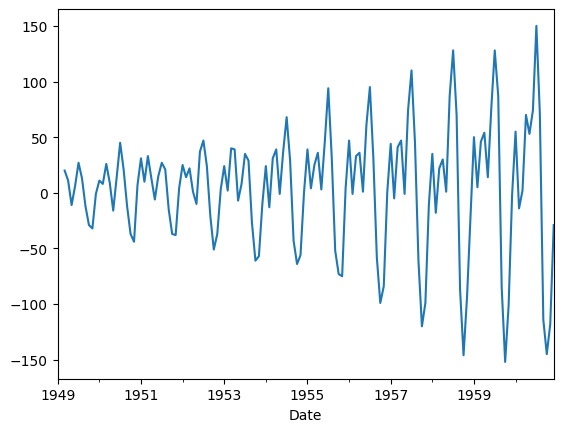

In [114]:
flight['2ndshifted'].plot()

In [ ]:
flight = sns.load_dataset('flights')
flight['Date'] = flight['year'].astype(str)+'-'+flight['month'].astype(str)
flight['Date'] = pd.to_datetime(flight['Date'])
flight.set_index('Date', inplace=True)
flight.pop('year')
flight.pop('month')